# Yelp Data Analysis
Following analysis uses Kaggle's dataset and Eda's yelp-analysis.
Compared traditional data analysis with Logistic Regression.

In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# this will allow ploting inside the notebooky for visualization
%matplotlib inline

import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
#plotly.tools.set_config_file(world_readable=True, sharing='public')
import warnings
warnings.filterwarnings('ignore')


# 1) Data Preparation & Initial Analysis
We downloaded jason and csv files from Kaggle. Data totaled at 8 GB and was loaded into AWS S3.   https://console.aws.amazon.com/s3/buckets/finalproject-ucbdata2019/?region=us-east-2&tab=overview

Jupyter notebook was imported into ZEPL and used to call AWS S3 for data.  https://www.zepl.com/OXCKOPDEM/notebooks/573d647fef5f4abfbe8d70f0fde7a685
ZEPL turned out slow for data transfer and not compatible with class internet service. We moved our notebook into Colab. 

Due to time constraints, we ran model in local environment and post results. 

### Understanding the data

    - Business - Contains business data including location data, and categories.  
    - Attrobutes - different business attributes
    - Reviews - Contains full review text data including the user_id that wrote the review and the business_id.  
    - User - User data including the user's friend mapping and all the metadata associated with the user.  
    - Checkin - Checkins on a business.  
    - Tips - Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.  
    - Photos - As of now, I'm going to ignore anything to do with photo identification

### 1.1 Understanding Business data - business, attribute and hours

In [3]:
yelp_bdf = pd.read_csv('yelp_business.csv')
yelp_attr = pd.read_csv('yelp_business_attributes.csv')
yelp_bizhrs = pd.read_csv('yelp_business_hours.csv')

#### Replacing all True/False to 1/0 in Business Attributes


In [4]:
cols_v = list(yelp_attr.columns.values)[1:]

for i in range(len(cols_v)):
    #print(cols_v[i])
    yelp_attr[cols_v[i]].replace('Na', np.nan, inplace=True)
    yelp_attr[cols_v[i]].replace('True', 1, inplace=True)
    yelp_attr[cols_v[i]].replace('False', 0, inplace=True)

### 1.2 Understanding Reviews data

In [5]:
yelp_rev_all = pd.read_csv('yelp_review.csv')
# yelp_rev = yelp_rev_all.loc[yelp_rev_all["date"] > "2017-01-01"]

In [6]:
yelp_rev_all.shape # 5.25 milion records 

(5261668, 9)

In [7]:
yelp_rev = yelp_rev_all
# .sample(n=500, random_state=1234)
yelp_rev.dropna()
yelp_rev.describe()

,stars,useful,funny,cool
count,5.261668e+06,5.261668e+06,5.261668e+06,5.261668e+06
mean,3.727739e+00,1.385085e+00,5.091961e-01,5.860917e-01
std,1.433593e+00,4.528727e+00,2.686168e+00,2.233706e+00
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
max,5.000000e+00,3.364000e+03,1.481000e+03,1.105000e+03


In [8]:
print(yelp_rev.columns)

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')


In [9]:
yelp_rev.tail(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
5261666,hqQ1UTFKMN2P1ezUow48OQ,mPjPyipaD0C_myqWqDipZg,EO3i5kTUG7_S2OIQ23sdSA,3,2011-11-07,"A small, cozy family run Authentic korean rest...",2,0,0
5261667,ldsIs3sGXPJ7WM7VyAm4lQ,mPjPyipaD0C_myqWqDipZg,HloEEXm_QzEpycuwA_RtQA,3,2011-11-15,Really nice atmosphere and settings and very c...,0,1,1


In [10]:
### lOGISTIC REGRESSION MODEL FROM USEFUL FUNNY COOL TO 

In [11]:
#  Remove features that create noise and result in improved model
df = yelp_rev.drop(columns=['review_id', 'user_id','business_id','date','text'])

### Logistic Regression Model for label (stars) and features( useful, funny, cool)

### 1.2.1 Create a Train and Test Split 
Use stars for the y values

In [12]:
from sklearn.model_selection import train_test_split # Separate data into train (75%) and test (25%)
y = df["stars"]  # define label
X = df.drop(columns=["stars"])  # drop label from features

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y) # random sample of label and features

In [14]:
X_train.tail(3)

,useful,funny,cool
5182628,1,1,2
408525,0,0,0
1808645,3,1,1


In [15]:
y_train.shape  # train set has 3 million records

(3946251,)

### 1.2.2 Pre-processing
Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
from sklearn.preprocessing import MinMaxScaler # normalize features between  1 and 0

In [17]:
# Scale your data
X_scale = MinMaxScaler().fit(X_train)  # feature selection

In [18]:
scaled_X_train = X_scale.transform(X_train)
scaled_X_test = X_scale.transform(X_test)

In [19]:
# Sample testing
scaled_X_test

array([[0.00029718, 0.        , 0.00090416],
       [0.00029718, 0.        , 0.00090416],
       [0.00118871, 0.00135044, 0.00180832],
       ...,
       [0.00029718, 0.        , 0.00090416],
       [0.00118871, 0.00067522, 0.00180832],
       [0.00148588, 0.        , 0.00090416]])

### 1.2.3  Create and Train the Logistic Regression Model for Classification

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")  #not very good result at 0.30

Training Data Score: 0.3391821756902944
Testing Data Score: 0.33843108307099573


### 1.2.4  Hyperparameter Tuning
Use GridSearchCV to tune the model's parameters

In [22]:
# Create the GridSearchCV model

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, {'C': [1, 10], 'penalty': ["l1", "l2"]}, verbose=3)

In [23]:
# Train the model with GridSearch

grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.441, total=  10.6s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] ..................... C=1, penalty=l1, score=0.442, total=  10.8s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.4s remaining:    0.0s


[CV] ..................... C=1, penalty=l1, score=0.442, total=  10.4s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.441, total=  13.6s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.442, total=  14.6s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.442, total=  14.0s
[CV] C=10, penalty=l1 ................................................
[CV] .................... C=10, penalty=l1, score=0.441, total=  10.8s
[CV] C=10, penalty=l1 ................................................
[CV] .................... C=10, penalty=l1, score=0.442, total=  10.3s
[CV] C=10, penalty=l1 ................................................
[CV] .................... C=10, penalty=l1, score=0.442, total=  10.7s
[CV] C=10, penalty=l2 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [24]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l1'}
0.44172278955393357


### 1.2.5  Save Logistic Regression Model

In [25]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'yelp.sav'
joblib.dump(model, filename)  # model at 0.44

['yelp.sav']

### Conclusion:  logistic Regression Model with 3 features (useful, funny, cool) was not adequate to predict Star ratings. 

### 1.3 Understanding user data

In [26]:
yelp_user = pd.read_csv('yelp_user.csv')
yelp_user.dropna()
yelp_user.shape

(1326100, 22)

In [27]:
yelp_user[['compliment_profile', 'compliment_writer',
       'cool', 'elite', 'fans', 'friends', 'funny', 'name', 'review_count',
       'useful', 'user_id', 'yelping_since']].tail(2)

,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
1326098,0,0,0,None,0,None,0,Cindy,33,5,s1BZ7-rpqb3xRKcxvArXsQ,2014-06-28
1326099,0,0,0,None,0,None,0,Amy,5,1,q-1Tz4SvaTpGEMhI_xwm0Q,2010-05-17


In [28]:
yelp_user[yelp_user['friends'].notnull()].tail(3)

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1326097,AU9aZSA1rAjNE5cFcZTVMA,Jalin,12,2015-11-11,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1326098,s1BZ7-rpqb3xRKcxvArXsQ,Cindy,33,2014-06-28,None,5,0,0,0,None,...,0,0,0,0,0,1,0,0,0,0
1326099,q-1Tz4SvaTpGEMhI_xwm0Q,Amy,5,2010-05-17,None,1,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0


### 1.4 Understanding tips data

In [29]:
yelp_tip = pd.read_csv('yelp_tip.csv')
yelp_tip.shape

(1098324, 5)

In [30]:
yelp_tip.tail(2)

,text,date,likes,business_id,user_id
1098322,"We waited 1.5 hour for the food, asked multipl...",2017-12-08,0,ZqTXN4qh0Ta1Lp8Z3v-dKg,kA6L6nrjJnu1bfkLGN8l9Q
1098323,"Beautiful location, beautiful event, beautiful...",2017-12-07,0,aY0ZSpAK7h7-SmP6KVS8oA,eqtEDyqn1kCXwlo2OKdW_Q


### 1.5 Understanding checkin data

In [31]:
yelp_checkin = pd.read_csv('yelp_checkin.csv')

In [32]:
yelp_checkin.tail(2)

,business_id,weekday,hour,checkins
3911216,y3YRUsh8FVih0AhYLx-DWA,Thu,21:00,1
3911217,MfWBM8gcsUn7RC_PmhsHhw,Tue,3:00,1


# 2) Data Processing

In [33]:
yelp_rev['business_id'].isin(yelp_bdf['business_id']).value_counts()

True     5188955
False      72713
Name: business_id, dtype: int64

### 2.1) Merge reviews, checkin, tip and business to create a new dataframe yelp_bdata

In [34]:
#Merge review & business data on business_id. Get the business name, categories as well.
yelp_reviewd = pd.merge(yelp_rev, yelp_bdf, on='business_id', how='left', suffixes=('_review', '_biz'))
yelp_reviewd.shape

(5261668, 21)

### Random Sampling to reduce 5million to 500 records

In [35]:
yelp_reviewd = yelp_reviewd.sample(n=500, random_state=1234)
yelp_reviewd.dropna()
yelp_reviewd.describe()

,stars_review,useful,funny,cool,latitude,longitude,stars_biz,review_count,is_open
count,500.000000,500.000000,500.000000,500.00000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,3.780000,1.626000,0.594000,0.66800,37.191090,-101.797367,3.730691,330.034553,0.871951
std,1.430977,3.989229,2.105714,2.57508,3.974256,19.116360,0.765959,666.664449,0.334484
min,1.000000,0.000000,0.000000,0.00000,33.261175,-115.333867,1.000000,3.000000,0.000000
25%,3.000000,0.000000,0.000000,0.00000,33.627712,-115.154984,3.500000,30.750000,1.000000
50%,4.000000,0.000000,0.000000,0.00000,36.113295,-111.988241,4.000000,99.000000,1.000000
75%,5.000000,2.000000,0.000000,1.00000,40.450298,-81.290135,4.000000,319.500000,1.000000
max,5.000000,47.000000,30.000000,42.00000,55.950728,9.272680,5.000000,7361.000000,1.000000


In [36]:
#Merge review & tips data on business_id. 
yelp_reviewd1 = pd.merge(yelp_reviewd, yelp_tip, on='business_id', how='left', suffixes=('_review', '_tip'))
yelp_reviewd1.shape

(34300, 25)

In [37]:
#Merge review & checkin data on business_id. 
yelp_reviewd11 = yelp_reviewd1.dropna()
yelp_reviewd11.shape

(21367, 25)

In [38]:
yelp_checkin.tail(2)

,business_id,weekday,hour,checkins
3911216,y3YRUsh8FVih0AhYLx-DWA,Thu,21:00,1
3911217,MfWBM8gcsUn7RC_PmhsHhw,Tue,3:00,1


In [39]:
yelp_reviewd2 = pd.merge(yelp_reviewd11, yelp_checkin, on='business_id', how="left")
yelp_businessdf = yelp_reviewd2
yelp_businessdf.tail(2)

,review_id,user_id_review,business_id,stars_review,date_review,text_review,useful,funny,cool,name,...,review_count,is_open,categories,text_tip,date_tip,likes,user_id_tip,weekday,hour,checkins
3017519,17BHjZuLjitqGQIKuzjzOA,2bCCGUaY0SB4Ky_tjLHaJA,nQD284VfImPe_UXkmq4yaQ,2,2014-03-09,I checked in at the Rumor after having to canc...,1,0,0,"""Rumor Boutique Resort""",...,573.0,0.0,Hotels;Event Planning & Services;Hotels & Travel,Terrible hotel to go to. Glad to see it closed...,2017-04-10,0.0,K8qJ4CGquFjE5oaGTMywiA,Thu,21:00,2.0
3017520,17BHjZuLjitqGQIKuzjzOA,2bCCGUaY0SB4Ky_tjLHaJA,nQD284VfImPe_UXkmq4yaQ,2,2014-03-09,I checked in at the Rumor after having to canc...,1,0,0,"""Rumor Boutique Resort""",...,573.0,0.0,Hotels;Event Planning & Services;Hotels & Travel,Terrible hotel to go to. Glad to see it closed...,2017-04-10,0.0,K8qJ4CGquFjE5oaGTMywiA,Tue,2:00,3.0


# 3) Exploratory Data Analysis

    - Different attributes and the businesses
    - Categories & businesses
    - What business has got more reviews
    - What kind of reviews
    - What were the main words in top reviews
    - What were the main words in top tips
    - Who is the top most reviewer
    - which states have got the more reviews from?
    - Is there a link that can be formed within the users? Is there a friend circle
    - What are the main attributes of the top most places reviewed? What is the price range? What kind of people visit those places?
As of now we have the following dataframes:
    - yelp_bizhrs - Business and hours details
    - yelp_attr - Business attributes details
    - yelp_biz - Business details without attributes
    - yelp_rev - All review info
    - yelp_user - User info
    - yelp_tip - Tip info
    - yelp_checkin - Checkin details of business
    - yelp_businessdf - Merged dataframe that has the details of business, reviews, the users that made the reviews, checkin details and tips about businesses.

As of now, I'm going to focus on this dataframe yelp_businessdf


## 3.1) Different attributes and the businesses

### 3.1.1) Business Ambience

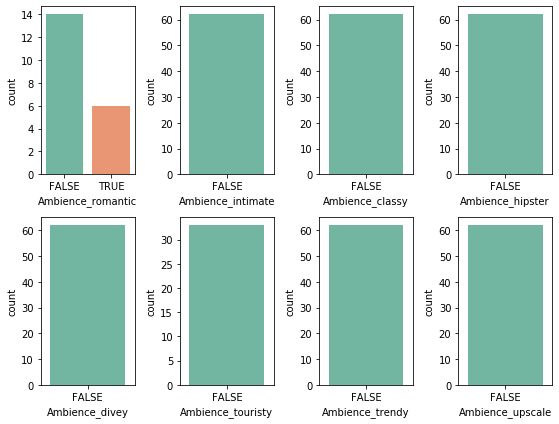

In [40]:
ambiencelist = yelp_attr.filter(like='Ambience').columns.tolist()
y = int(len(ambiencelist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        #print(i,j,ambiencelist[0])
        sns.countplot(yelp_attr[ambiencelist[0]], ax=ax[i,j], palette="Set2")
        del ambiencelist[0]
fig.tight_layout()        

### Most business do not have "ambience" only "romantic ambience".

### 3.1.2) Business Parking

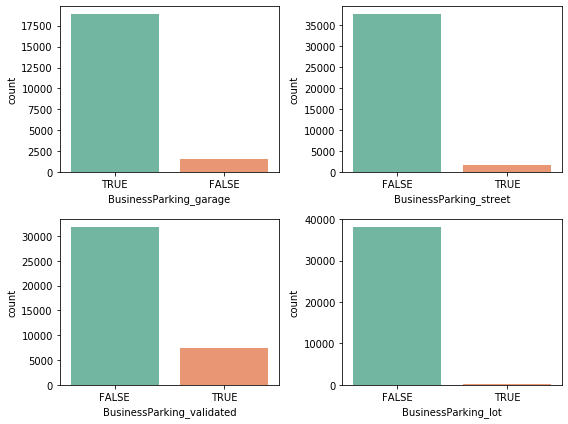

In [41]:
bplist = yelp_attr.filter(like='BusinessParking').columns.tolist()
y = int(len(bplist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        #print(i,j,ambiencelist[0])
        sns.countplot(yelp_attr[bplist[0]], ax=ax[i,j], palette="Set2")
        del bplist[0]
fig.tight_layout()        


### Most business do not have parking information.  Validated parking were the most notable.

### 3.1.3) Best Nights of the Business

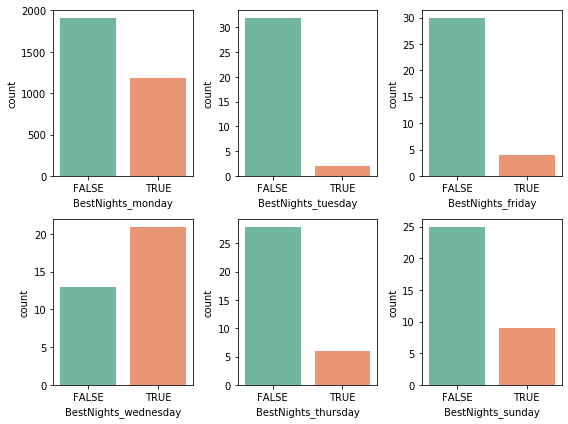

In [42]:
bnlist = yelp_attr.filter(like='BestNights').columns.tolist()
y = int(len(bnlist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        #print(i,j,ambiencelist[0])
        sns.countplot(yelp_attr[bnlist[0]], ax=ax[i,j], palette="Set2")
        del bnlist[0]
fig.tight_layout()        

### Best nights of business are Monday and Wednesday.

### 3.1.4) Good for Meal - Restaurant businesses

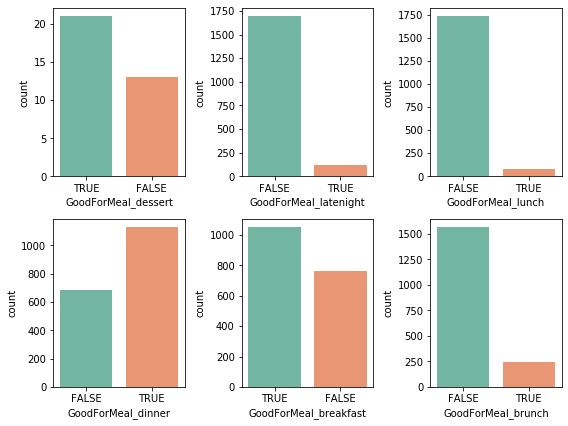

In [43]:
meallist = yelp_attr.filter(like='GoodForMeal').columns.tolist()
y = int(len(meallist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        sns.countplot(yelp_attr[meallist[0]], ax=ax[i,j], palette="Set2")
        del meallist[0]
fig.tight_layout()        


### Most important features are "dinner", "dessert", "breakfast", "brunch" for getting a good meal. 

### 3.1.5) Dietary Restrictions - Restaurants

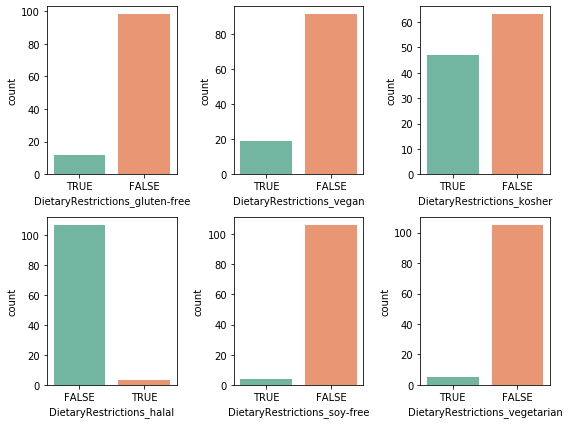

In [44]:
dtlist = yelp_attr.filter(like='DietaryRestrictions').columns.tolist()
del dtlist[0]
y = int(len(dtlist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        sns.countplot(yelp_attr[dtlist[0]], ax=ax[i,j], palette="Set2")
        del dtlist[0]
fig.tight_layout()        

### Most important dietary restrictions are vegan, vegitarian, gluten-free, soy-free, or kosher.

### 3.1.6) Music - offered by Business

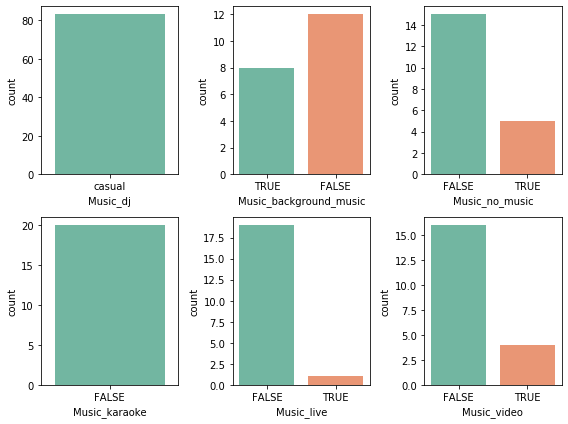

In [45]:
mlist = yelp_attr.filter(like='Music').columns.tolist()
y = int(len(mlist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        sns.countplot(yelp_attr[mlist[0]], ax=ax[i,j], palette="Set2")
        del mlist[0]
fig.tight_layout()        

### Most important music is background-music, no-music, video, and live-music.

### 3.2) Categories & businesses

In [46]:
#yelp_businessdf['categories'][yelp_businessdf['categories'].notnull()] = yelp_businessdf['categories'][yelp_businessdf['categories'].notnull()].apply(','.join)

In [47]:
yelp_businessdf['categories'].head()

0    Restaurants;Breakfast & Brunch;Chocolatiers & ...
1    Restaurants;Breakfast & Brunch;Chocolatiers & ...
2    Restaurants;Breakfast & Brunch;Chocolatiers & ...
3    Restaurants;Breakfast & Brunch;Chocolatiers & ...
4    Restaurants;Breakfast & Brunch;Chocolatiers & ...
Name: categories, dtype: object

In [48]:
cat_list = set()
for sstr in yelp_businessdf['categories'][yelp_businessdf['categories'].notnull()].str.split(';'):
    cat_list = set().union(sstr, cat_list)
cat_list = list(cat_list)
# cat_list.remove('')

In [49]:
cat_count = []
for cat in cat_list:
    cat_count.append([cat,yelp_businessdf['categories'].str.contains(cat).sum()])

### 3.2.1) Top categories of Businesses from yelp

In [50]:
names = ['cat_name','cat_count']
cat_df = pd.DataFrame(data=cat_count, columns=names)
cat_df.sort_values("cat_count", inplace=True, ascending=False)
cat_df.head(10)

,cat_name,cat_count
64,Restaurants,1952198
141,Event Planning & Services,1122695
18,Hotels & Travel,992134
134,Hotels,992134
87,Arts & Entertainment,956979
83,Casinos,908518
106,Breakfast & Brunch,704977
78,Bars,659952
3,Food,615442
95,Nightlife,607732


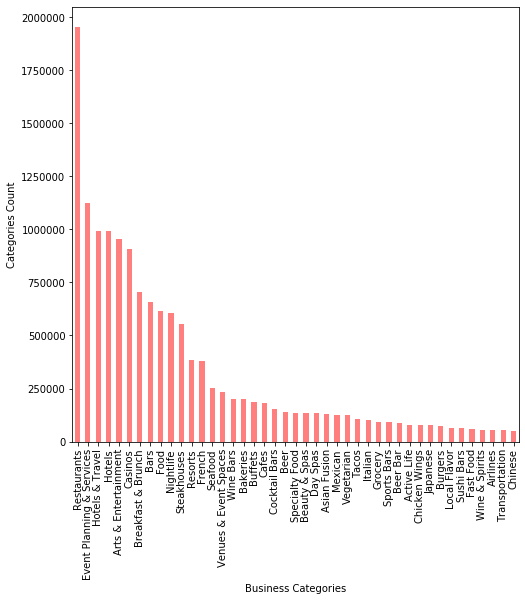

In [51]:
plt.subplots(figsize=(8, 8))
labels=cat_df['cat_name'][cat_df['cat_count']>50000]
cat_df['cat_count'][cat_df['cat_count']>50000].plot.bar( align='center', alpha=0.5, color='red')
y_pos = np.arange(len(labels))
#plt.yticks(y_pos, labels)
plt.xticks(y_pos, labels)
plt.xlabel('Business Categories')
plt.ylabel('Categories Count')

plt.show()

### 3.3) Business Ratings distribution

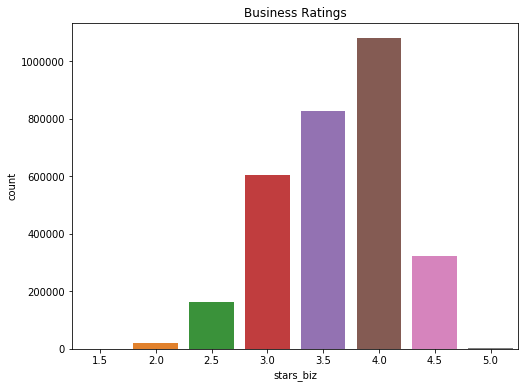

In [52]:
plt.figure(figsize=(8,6))
ax = sns.countplot(yelp_businessdf['stars_biz'])
plt.title('Business Ratings');

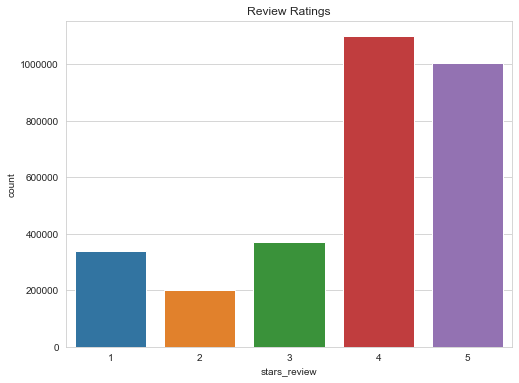

In [53]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.countplot(yelp_businessdf['stars_review'])
plt.title('Review Ratings');

### 3.4) What businesss has got more reviews ?

In [54]:
yelp_businessdf.name.value_counts().index[:20].tolist()

['"Bouchon at the Venezia Tower"',
 '"Mon Ami Gabi"',
 '"ARIA Resort & Casino"',
 '"Hash House A Go Go"',
 '"MGM Grand Hotel"',
 '"Planet Hollywood Las Vegas Resort & Casino"',
 '"Tacos El Gordo"',
 '"Red Rock Casino Resort & Spa"',
 '"Joes Seafood Prime Steak & Stone Crab"',
 '"Yard House"',
 '"The Buffet at Bellagio"',
 '"Treasure Island"',
 '"The Mirage"',
 '"Fremont Street Experience"',
 '"Hard Rock Hotel & Casino"',
 '"Southwest Airlines"',
 '"Rise & Shine - A Steak & Egg Place"',
 '"LVH - Las Vegas Hotel & Casino"',
 '"Echo & Rig"',
 '"Las Vegas Convention Center"']

In [55]:
biz_cnt = pd.DataFrame(yelp_businessdf['name'].value_counts()[:20])

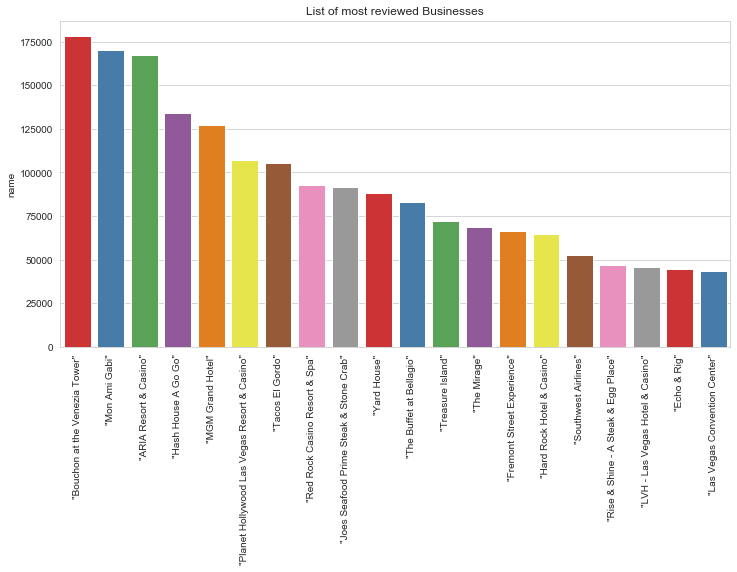

In [56]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=biz_cnt.index, y=biz_cnt['name'], palette = 'Set1')
plt.title('List of most reviewed Businesses');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

### 3.5) Cities & States - where the reviews are most?

In [57]:
city_cnt = pd.DataFrame(yelp_businessdf['city'].value_counts()[:20])
state_cnt = pd.DataFrame(yelp_businessdf['state'].value_counts()[:20])

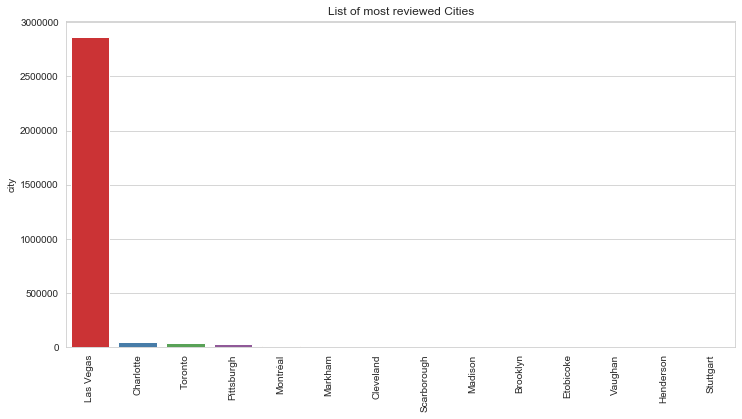

In [58]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=city_cnt.index, y=city_cnt['city'], palette = 'Set1')
plt.title('List of most reviewed Cities');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

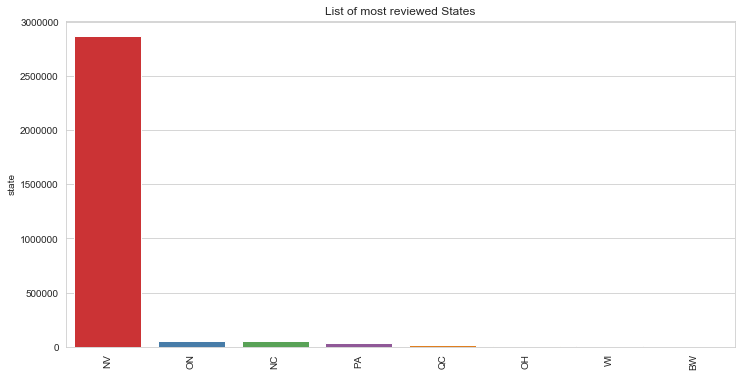

In [59]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=state_cnt.index, y=state_cnt['state'], palette = 'Set1')
plt.title('List of most reviewed States');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

### States with most resturant reviews is Nevada

### 3.6) Review Dates period

In [60]:
from datetime import datetime
yelp_businessdf['date_review'] = pd.to_datetime(yelp_businessdf['date_review'])

In [61]:
yelp_businessdf['date_review'] = pd.to_datetime(yelp_businessdf['date_review'], format='%Y%m%d')
yelp_businessdf['month_review'] = yelp_businessdf.date_review.dt.to_period('M')

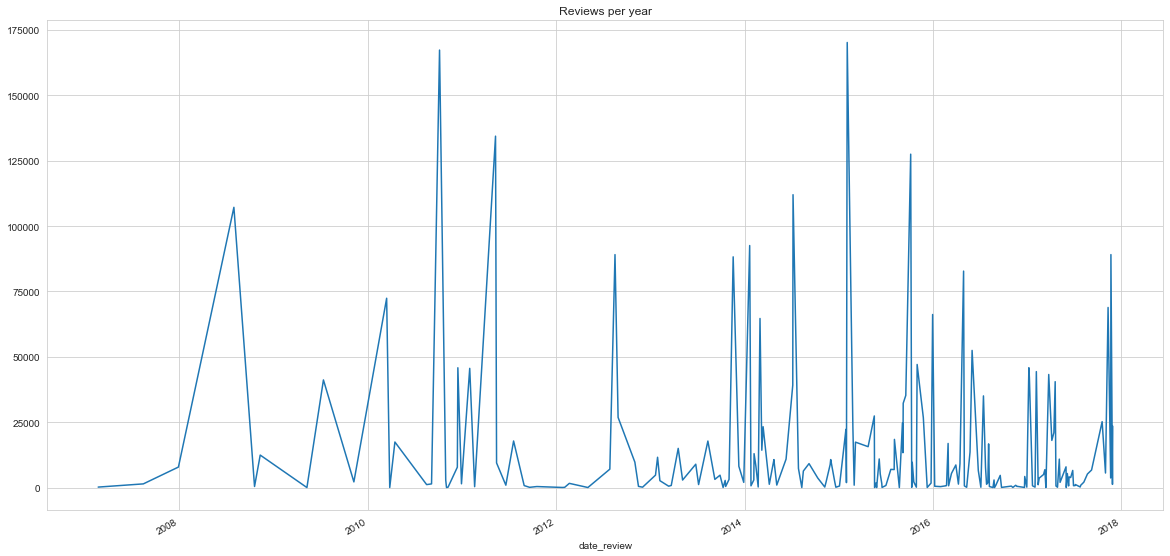

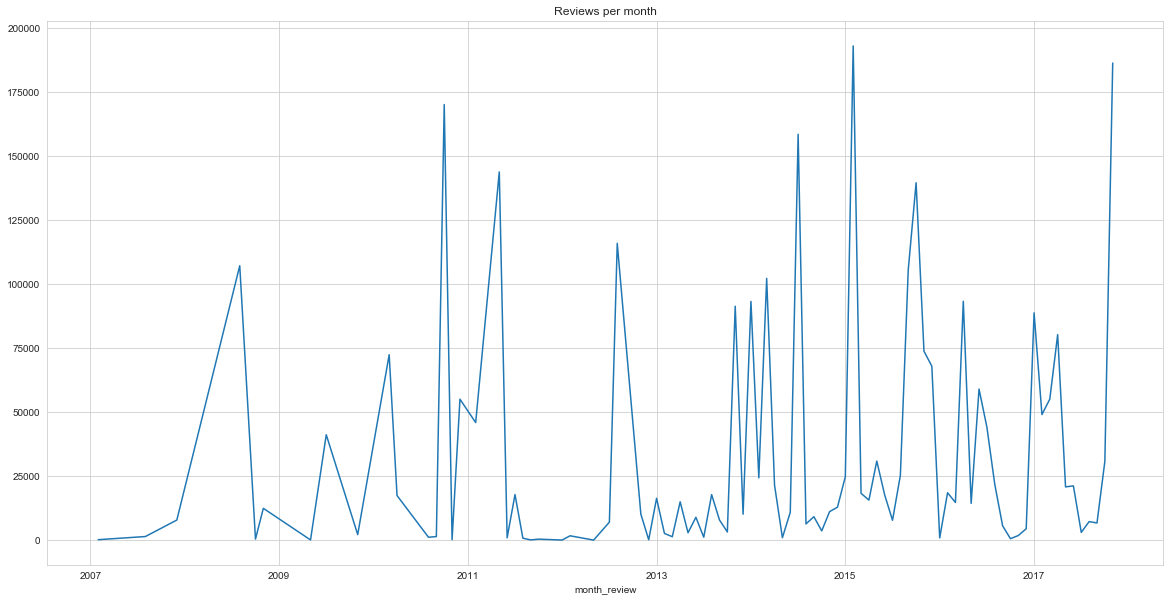

In [62]:
#Reviews per year and month

grp_date = yelp_businessdf.groupby(['date_review'])['business_id'].count()
grp_month = yelp_businessdf.groupby(['month_review'])['business_id'].count()

ts = pd.Series(grp_date)
ts.plot(kind='line', figsize=(20,10),title='Reviews per year')
plt.show()

ts = pd.Series(grp_month)
ts.plot(kind='line', figsize=(20,10),title='Reviews per month')
plt.show()

### More resturant reviews after 2015.

### 3.7) Which user reviewed the most?

In [63]:
aggregations = {
    'review_id' : 'count',
    'cool':'sum',
    'funny':'sum',
    'useful':'sum',    
    'stars_review': 'mean'
}

In [64]:
#The user who has given most reviews
user_top10 = yelp_businessdf.groupby(['user_id_review'], as_index=False).agg(aggregations).sort_values(by='review_id', ascending=False)
user_top10.head(3)

,user_id_review,review_id,cool,funny,useful,stars_review
33,9Bw-95dQXJ-APlCl53nA-w,170232,0,0,0,5
172,oh2JwOAtAF4TDMp8H3uvqQ,167328,0,0,0,4
55,Dm_T5EPdELhxkGtziK36pw,134400,134400,134400,134400,3


In [65]:
#The user who has given most helpful reviews
yelp_businessdf.groupby(['user_id_review'], as_index=False).agg(aggregations).sort_values(by='useful', ascending=False).head(3)

,user_id_review,review_id,cool,funny,useful,stars_review
57,FH3GgmOeAgXST37jG1-uWg,22275,66825,111375,445500,3
113,VzdF-Eqnp3FpKb8cYWeTSw,40500,0,0,364500,4
54,Db80SCez0BdYaHdC0xmzoQ,16700,217100,116900,317300,3


### 3.8) Word Cloud for Top reviewed businesses 

In [66]:
from collections import Counter 
# wordcloud in python
from wordcloud import WordCloud, STOPWORDS 

import re 
import string
import nltk # preprocessing text
from textblob import TextBlob

### Tokienize reviews 

In [67]:
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there'))

In [68]:
# function for pre-processing the text of reviews: this function remove punctuation, stopwords and returns the list of words
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)

In [69]:
yelp_top_reviewd_biz = yelp_businessdf.loc[yelp_businessdf['name'].isin(biz_cnt.index)]

In [70]:
yelp_top_reviewd_biz['text_processed'] = yelp_top_reviewd_biz['text_review'].apply(preprocess)

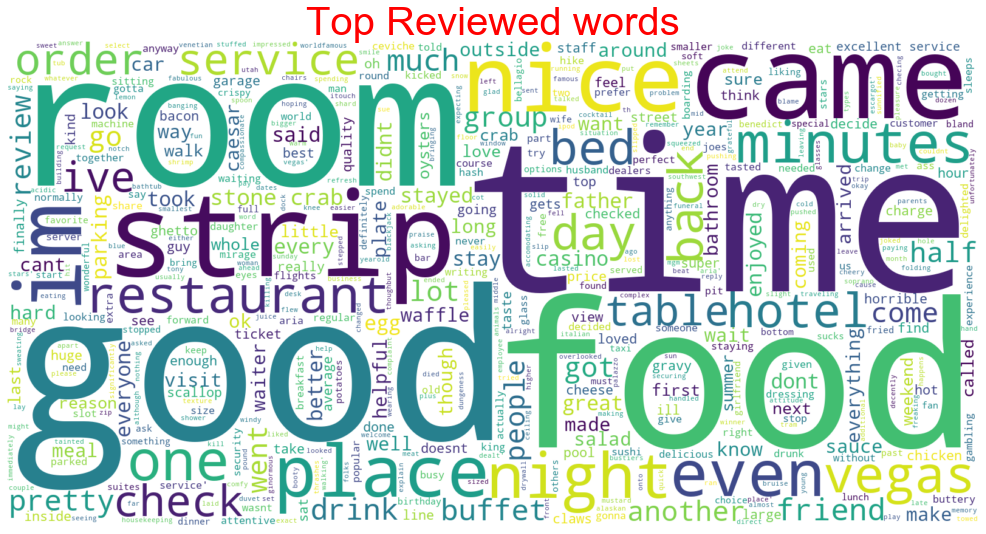

In [71]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(yelp_top_reviewd_biz['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Reviewed words", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

### 3.9) Word Cloud for Top reviewed tip 

In [72]:
yelp_top_reviewd_biz['tip_text_processed'] = yelp_top_reviewd_biz['text_tip'].dropna().apply(preprocess) # tokienize

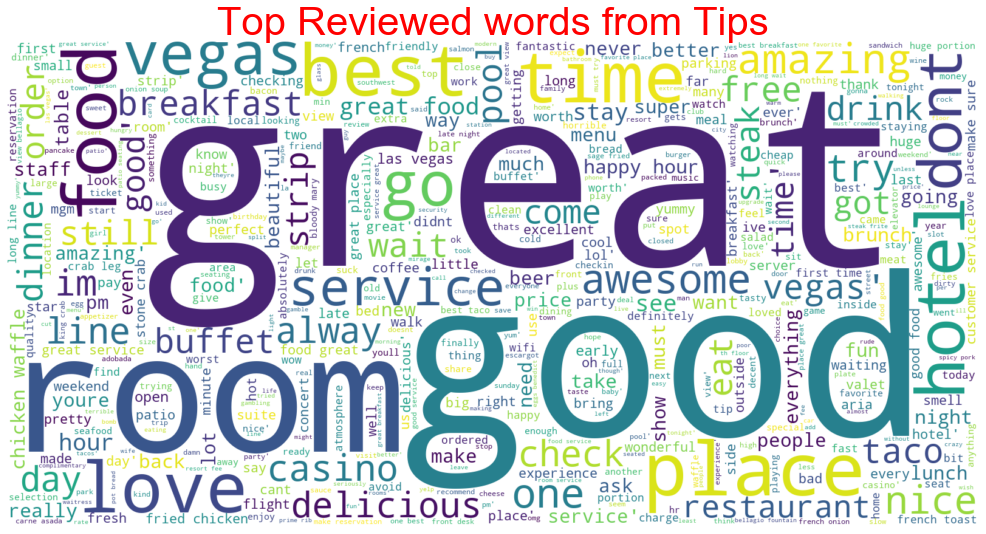

In [73]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',) # corpus
wordcloud.generate(str(set(yelp_top_reviewd_biz['tip_text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Reviewed words from Tips", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

# Sentiment analysis

In [74]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [75]:
yelp_top_reviewd_biz['text_sentiment'] = yelp_top_reviewd_biz['text_processed'].apply(sentiment)

In [76]:
yelp_top_reviewd_biz['sentiment'] = ''
yelp_top_reviewd_biz['sentiment'][yelp_top_reviewd_biz['text_sentiment'] > 0] = 'positive'
yelp_top_reviewd_biz['sentiment'][yelp_top_reviewd_biz['text_sentiment'] < 0] = 'negative'
yelp_top_reviewd_biz['sentiment'][yelp_top_reviewd_biz['text_sentiment'] == 0] = 'neutral'

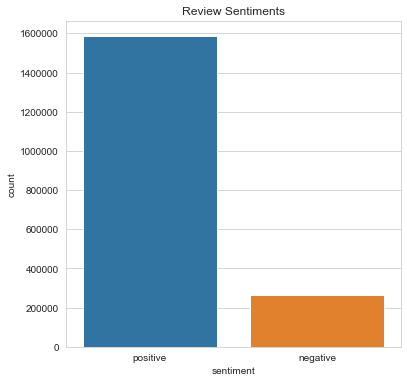

In [77]:
plt.figure(figsize=(6,6))
ax = sns.countplot(yelp_top_reviewd_biz['sentiment'])
plt.title('Review Sentiments');

In [78]:
yelp_top_reviewd_biz_posr = pd.DataFrame(yelp_top_reviewd_biz['text_processed'][ yelp_top_reviewd_biz['sentiment'] == 'positive'])
yelp_top_reviewd_biz_negr = pd.DataFrame(yelp_top_reviewd_biz['text_processed'][ yelp_top_reviewd_biz['sentiment'] == 'negative'])
yelp_top_reviewd_biz_neutr = pd.DataFrame(yelp_top_reviewd_biz['text_processed'][ yelp_top_reviewd_biz['sentiment'] == 'neutral'])

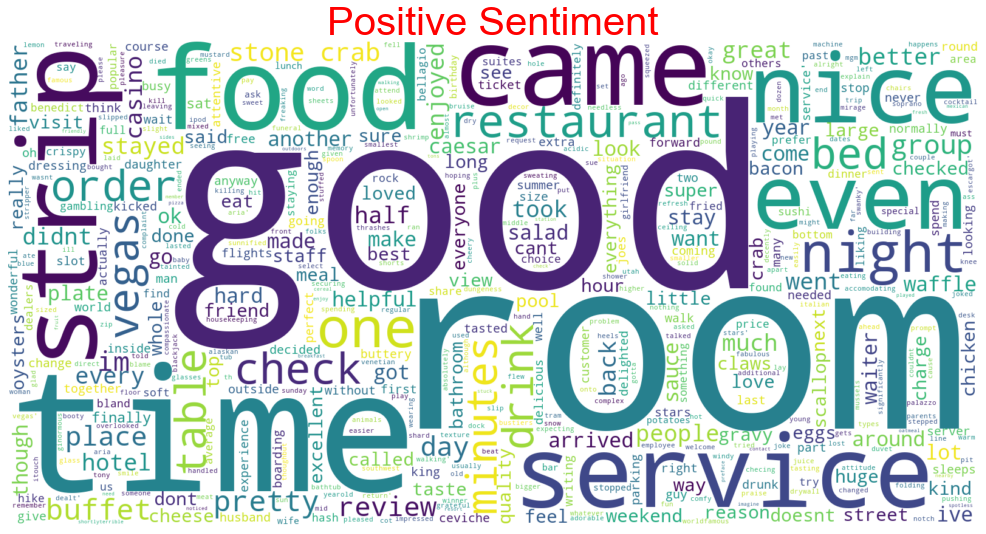

In [79]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(yelp_top_reviewd_biz_posr['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

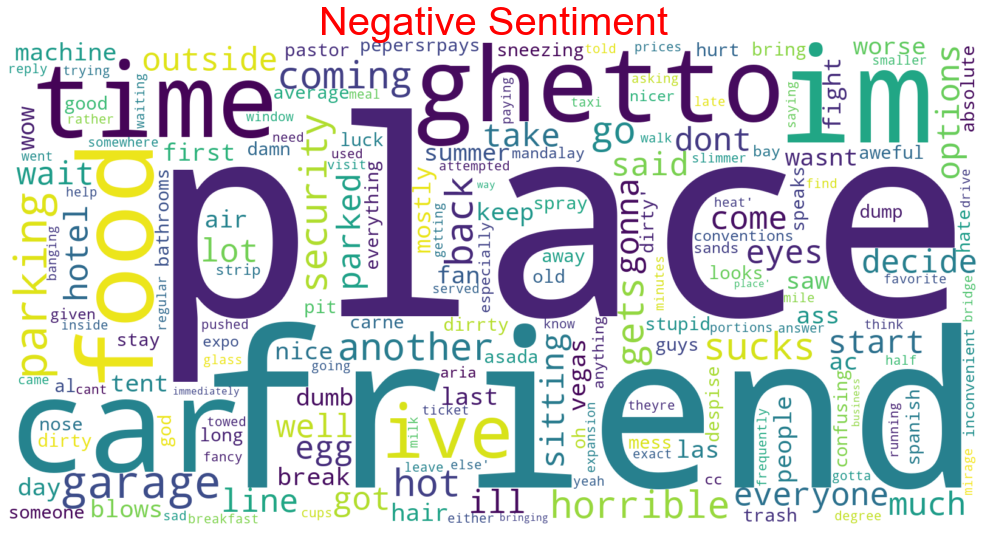

In [80]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(yelp_top_reviewd_biz_negr['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Negative Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

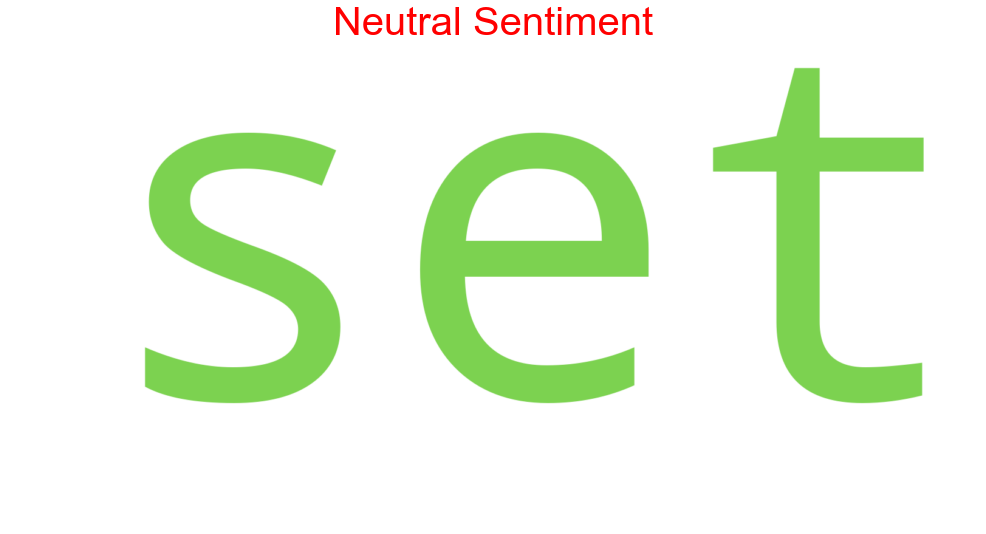

In [81]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(yelp_top_reviewd_biz_neutr['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Neutral Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()